In [1]:
# Import necessary packages
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime 

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# **Player data**
nflId: Player identification number, unique across players (numeric)

height: Player height (text)

weight: Player weight (numeric)

birthDate: Date of birth (YYYY-MM-DD)

collegeName: Player college (text)

position: Player position (text)

displayName: Player name (text)

In [2]:
player = pd.read_csv("../input/nfl-big-data-bowl-2021/players.csv")


In [3]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1303 non-null   int64 
 1   height       1303 non-null   object
 2   weight       1303 non-null   int64 
 3   birthDate    1303 non-null   object
 4   collegeName  1303 non-null   object
 5   position     1303 non-null   object
 6   displayName  1303 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.4+ KB


In [4]:
player['height'].value_counts()

73      159
72      153
74      141
75      136
71      127
76       90
70       81
77       67
6-2      42
78       37
69       37
6-0      33
5-10     32
6-1      29
5-11     27
6-3      25
6-4      25
68       18
6-5      11
5-9       9
79        9
80        3
67        3
66        2
6-6       2
6-7       2
5-7       1
5-6       1
5-8       1
Name: height, dtype: int64

there are unwanted characters that should be removed/corrected from the height column before converting the column from object to numeric  

In [5]:
player['height'] = player['height'].str.replace('[-]', '') 

In [6]:
#convert the height column from object type to int 
player['height'] = pd.to_numeric(player['height'])

player.head(10)

nflId  height  weight   birthDate             collegeName position  \
0  2539334      72     190  1990-09-10              Washington       CB   
1  2539653      70     186  1988-11-01  Southeastern Louisiana       CB   
2  2543850      69     186  1991-12-18                  Purdue       SS   
3  2555162      73     227  1994-11-04         Louisiana State      MLB   
4  2555255      75     232  1993-07-01               Minnesota      OLB   
5  2555543      73     216  1995-07-26                 Florida       FS   
6  2556445      70     211  1992-10-20                 Florida       CB   
7  2507763      60     200  08/01/1986             Mississippi       WR   
8  2532842      78     243  1989-01-20                 Arizona       QB   
9  2540158      77     250  1990-11-10                Stanford       TE   

          displayName  
0     Desmond Trufant  
1       Robert Alford  
2       Ricardo Allen  
3         Deion Jones  
4  De'Vondre Campbell  
5          Keanu Neal  
6         Brian Poole  
7        Mike Wallace  
8          Nick Foles  
9           Zach Ertz

In [7]:
#sort the dataframe values from the height column 
player = player.sort_values(by=['weight'], ascending=False)
#convert birthdate column to age
#player['birthDate'] = pd.to_datetime(player['birthDate'], format='%m%d%y')
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
player['birthDate'] =  pd.to_datetime(player['birthDate'], infer_datetime_format=True)
player['age'] = player['birthDate'].apply(lambda x: from_dob_to_age(x))
player.head(10)

nflId  height  weight  birthDate            collegeName position  \
1222  2533433      76     352 1989-11-16           Regina, Can.       DT   
1163  2535718      75     350 1988-11-29           William Penn       DT   
1292  2560909      76     347 1995-02-05             Washington       DT   
1069  2555388      75     347 1994-07-01                Clemson       DT   
1034  2556650      72     345 1992-11-06                Samford       DT   
1185  2541302      73     336 1989-02-21      Missouri Southern       DT   
1239  2550242      76     332 1991-05-09  Colorado State-Pueblo       DT   
1099   496802      76     329 1988-10-10          East Carolina       DT   
1217  2552326      75     320 1991-12-14               Maryland       DT   
1138  2539230      76     318 1991-09-08                Georgia       NT   

           displayName  age  
1222       Akiem Hicks   30  
1163    Damon Harrison   31  
1292          Vita Vea   25  
1069       D.J. Reader   26  
1034    Michael Pierce   27  
1185  Brandon Williams   31  
1239       Mike Pennel   29  
1099     Linval Joseph   32  
1217      Darius Kilgo   28  
1138        Abry Jones   29

In [8]:
player = player.sort_values(by=['age'], ascending=False)
player

nflId  height  weight  birthDate          collegeName position  \
244   2504211      76     225 1977-08-03             Michigan       QB   
302   2504775      72     209 1979-01-15               Purdue       QB   
1145  2505076      76     218 1979-07-04    Sam Houston State       QB   
1258  2505010      67     295 1980-01-18       North Carolina       DE   
614   2505299      64     255 1980-06-18           Kent State       TE   
...       ...     ...     ...        ...                  ...      ...   
903   2561029      71     180 1997-01-14           Texas Tech       WR   
359   2560968      72     233 1997-02-09           Penn State       RB   
890   2560770      71     208 1997-08-03  Southern California       RB   
1132  2560890      77     228 1997-02-03        Florida State       WR   
66    2560713      77     250 1998-05-02        Virginia Tech       LB   

           displayName  age  
244          Tom Brady   43  
302         Drew Brees   41  
1145       Josh McCown   41  
1258    Julius Peppers   40  
614      Antonio Gates   40  
...                ...  ...  
903        Keke Coutee   23  
359     Saquon Barkley   23  
890       Ronald Jones   23  
1132        Auden Tate   23  
66    Tremaine Edmunds   22  

[1303 rows x 8 columns]

player that are > 30 old years  : 255 players 

In [9]:
player_30 = player[player['age'] > 30] 
player_30

nflId  height  weight  birthDate        collegeName position  \
244   2504211      76     225 1977-08-03           Michigan       QB   
302   2504775      72     209 1979-01-15             Purdue       QB   
1145  2505076      76     218 1979-07-04  Sam Houston State       QB   
1258  2505010      67     295 1980-01-18     North Carolina       DE   
614   2505299      64     255 1980-06-18         Kent State       TE   
...       ...     ...     ...        ...                ...      ...   
1194  2508109      77     295 1989-05-06         Ohio State       DT   
500   2495343      69     185 1989-04-26        Chattanooga       CB   
1287  2550647      62     253 1989-08-17     Boston College      OLB   
429   2495459      60     205 1989-01-26           Maryland       WR   
20    2495454      75     220 1989-02-08            Alabama       WR   

          displayName  age  
244         Tom Brady   43  
302        Drew Brees   41  
1145      Josh McCown   41  
1258   Julius Peppers   40  
614     Antonio Gates   40  
...               ...  ...  
1194  Cameron Heyward   31  
500     Buster Skrine   31  
1287    Kasim Edebali   31  
429      Torrey Smith   31  
20        Julio Jones   31  

[255 rows x 8 columns]

**Analyzing Position variable **: 
https://abbreviations.yourdictionary.com/articles/football-positions-abbreviations-and-meanings.html

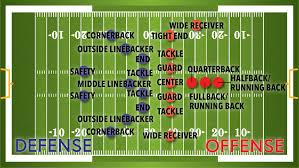


In [10]:
player['position'].value_counts() 


WR     228
CB     195
RB     135
TE     128
OLB    100
QB      71
FS      65
LB      58
SS      58
ILB     56
DE      49
DB      33
MLB     29
DT      28
FB      19
P       13
LS      12
S       11
K        5
NT       5
HB       5
Name: position, dtype: int64

1. **Abbreviations for Soccer Midfielder Positions**
* LW: Left Winger; Plays along sideline to shoot, assist, and score
**Abbreviations for Offense Positions**
* RB: Running Back; Can run the ball, make a catch, block, or even throw the ball 
* TE: Tight End; Blocks or catches passes
* QB: Quarterback; Calls the plays and initiates ball action
* HB: Halfback; Runs the ball or blocks, the other running back position

1. **Abbreviations for Special Teams Positions**
* P: Punter; Punts the ball to the opposing team
* LS: Long Snapper; Takes position of C for long snaps, as in the case of field goals and punts
1. **Abbreviations for Soccer Forward Positions**
* S: Striker; Focuses on scoring
* K: Kicker; Kicks field goals (FG) and extra points (XP)


1. **Abbreviations for Defense Positions :**
 * SS: Strong Safety; Stop TEs, RBs, and WRs; Tends to play closer to the DL than FS
 * FS: Free Safety; Stop TEs, RBs, and WRs; Tends to play further from the DL than FS, aligned with the offense’s TE
 * OLB: Outside Linebacker; Tackle ball carrier; Aligns toward outer portion of formation
 * CB: Center-back; Stop other team from getting near GK
 * LB: Linebacker; Tackle ball carrier; Sets up between DL and FS/SS
 * ILB: Inside Linebacker; Tackle ball carrier; Aligns toward inner portion of formation
 * DE: Defensive End; Get past OL, tackle QB, or tackle ball carriers; Sets up at either end of the DL
 * MLB: Middle Linebacker; Tackle ball carrier; Aligns in center of formation
 * DT: Defensive Tackle; Get past OL, tackle QB, or tackle ball carriers; Sets up in the middle of the DL
 * FB: Fullback; Lead blocker, one of two running back positions
 * S: Safety;  Stop TEs, RBs, and WRs; Sets up in the back of the formation
 * NT: Nose Tackle; Hold off as many OL players as possible; Sets up in the center of the DL

*Documentation*
**pandas.pivot_table**(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)

In [11]:
table = player.pivot_table(index=['position'], aggfunc='median')
table.head(10) 

age  height      nflId  weight
position                                 
CB        27.0    72.0  2555277.0   193.0
DB        24.0    72.0  2560850.0   202.0
DE        28.0    75.0  2552272.0   265.0
DT        29.5    75.0  2550444.0   306.0
FB        28.0    72.0  2550235.0   240.0
FS        28.0    72.0  2543830.0   205.0
HB        24.0    73.0  2558112.0   219.0
ILB       28.0    73.0  2552315.0   237.0
K         35.0    73.0  2507374.0   207.0
LB        25.0    74.0  2560778.0   237.0

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, CB to WR
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     21 non-null     float64
 1   height  21 non-null     float64
 2   weight  21 non-null     float64
dtypes: float64(3)
memory usage: 672.0+ bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe62c5ba510>,
      dtype=object)

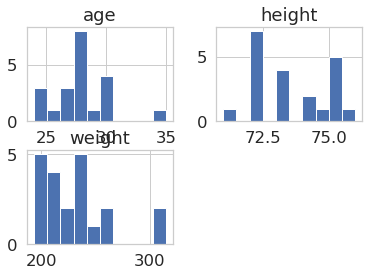

In [12]:
del table['nflId']
table.info()
table.hist()

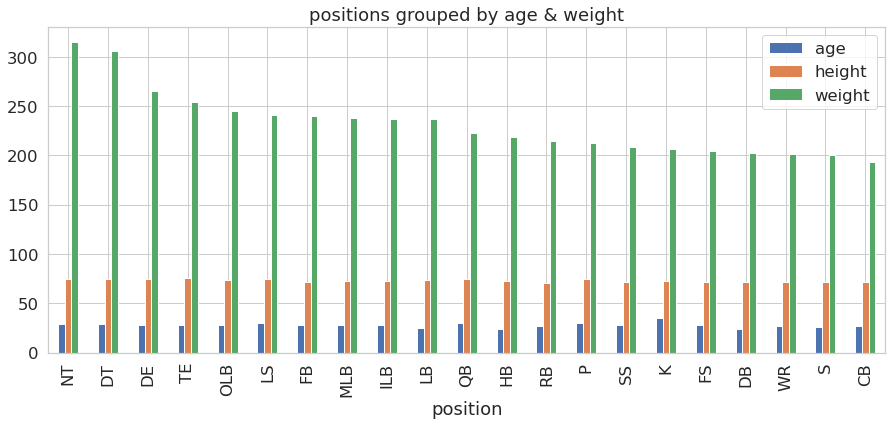

In [13]:
table.sort_values(by='weight',ascending=False).plot(kind='bar' ,figsize =(15,6), title ='positions grouped by age & weight')

 Nose Tackle  & Defensive tackle  & Defensive end  have the highest weights. 

# **Plays Analysis ******

In [14]:
plays = pd.read_csv("../input/nfl-big-data-bowl-2021/plays.csv")
plays

gameId  playId                                    playDescription  \
0      2018090600      75  (15:00) M.Ryan pass short right to J.Jones pus...   
1      2018090600     146  (13:10) M.Ryan pass incomplete short right to ...   
2      2018090600     168  (13:05) (Shotgun) M.Ryan pass incomplete short...   
3      2018090600     190  (13:01) (Shotgun) M.Ryan pass deep left to J.J...   
4      2018090600     256  (10:59) (Shotgun) M.Ryan pass incomplete short...   
...           ...     ...                                                ...   
19234  2018122200    2300  (7:53) J.Johnson pass incomplete short left [K...   
19235  2018122200    3177  (6:53) (Shotgun) B.Gabbert pass incomplete sho...   
19236  2018122201     566  (5:32) (Shotgun) P.Rivers pass deep right to K...   
19237  2018122201    1719  (1:08) P.Rivers pass incomplete deep middle to...   
19238  2018122201    2649  (7:16) (Shotgun) L.Jackson pass incomplete sho...   

       quarter  down  yardsToGo possessionTeam           playType  \
0            1     1         15            ATL     play_type_pass   
1            1     1         10            ATL     play_type_pass   
2            1     2         10            ATL     play_type_pass   
3            1     3         10            ATL     play_type_pass   
4            1     3          1            ATL     play_type_pass   
...        ...   ...        ...            ...                ...   
19234        3     2          5            WAS  play_type_unknown   
19235        4     3          7            TEN  play_type_unknown   
19236        1     3          4            LAC  play_type_unknown   
19237        2     3          1            LAC  play_type_unknown   
19238        3     1         10            BAL  play_type_unknown   

      yardlineSide  yardlineNumber  ... preSnapHomeScore gameClock  \
0              ATL              20  ...              0.0  15:00:00   
1              PHI              39  ...              0.0  13:10:00   
2              PHI              39  ...              0.0  13:05:00   
3              PHI              39  ...              0.0  13:01:00   
4              PHI               1  ...              0.0  10:59:00   
...            ...             ...  ...              ...       ...   
19234          WAS              31  ...              NaN       NaN   
19235          WAS              37  ...              NaN       NaN   
19236          LAC              49  ...              NaN       NaN   
19237          LAC              48  ...              NaN       NaN   
19238          LAC              49  ...              NaN       NaN   

       absoluteYardlineNumber  penaltyCodes penaltyJerseyNumbers passResult  \
0                        90.0           NaN                  NaN          C   
1                        49.0           NaN                  NaN          I   
2                        49.0           NaN                  NaN          I   
3                        49.0           NaN                  NaN          C   
4                        11.0           NaN                  NaN          I   
...                       ...           ...                  ...        ...   
19234                     NaN            DH               TEN 24          I   
19235                     NaN            DH               WAS 31          I   
19236                     NaN           OPI               LAC 13          C   
19237                     NaN           DPI               BAL 23          I   
19238                     NaN           DPI               LAC 43          I   

       offensePlayResult  playResult       epa  isDefensivePI  
0                     10          10  0.261827          False  
1                      0           0 -0.372360          False  
2                      0           0 -0.702779          False  
3                     33          33  3.047530          False  
4                      0           0 -0.842272          False  
...                  ...         ...       ... 

**Play data**
* gameId: Game identifier, unique (numeric)
 
* playId: Play identifier, not unique across games (numeric)

* playDescription: Description of play (text)
 
* quarter: Game quarter (numeric)

* down: Down (numeric)
 
* yardsToGo: Distance needed for a first down (numeric)
 
* possessionTeam: Team on offense (text)
 
* playType: Outcome of dropback: sack or pass (text)

* yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)

* yardlineNumber: Yard line at line-of-scrimmage (numeric)
 
* offenseFormation: Formation used by possession team (text)
 
* personnelO: Personnel used by offensive team (text)

* defendersInTheBox: Number of defenders in close proximity to line-of-scrimmage (numeric)
 
* numberOfPassRushers: Number of pass rushers (numeric)
 
* personnelD: Personnel used by defensive team (text)
 
* typeDropback: Dropback categorization of quarterback (text)
 
* preSnapHomeScore: Home score prior to the play (numeric)
 
* preSnapVisitorScore: Visiting team score prior to the play (numeric)
 
* gameClock: Time on clock of play (MM:SS)
 
* absoluteYardlineNumber: Distance from end zone for possession team (numeric)
 
* penaltyCodes: NFL categorization of the penalties that ocurred on the play. For purposes of this contest, the most important penalties are Defensive Pass Interference (DPI), Offensive Pass Interference (OPI), Illegal Contact (ICT), and Defensive Holding (DH). Multiple penalties on a play are separated by a ; (text)
 
* penaltyJerseyNumber: Jersey number and team code of the player commiting each penalty. Multiple penalties on a play are separated by a ; (text)
 
* passResult: Outcome of the passing play (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, text)

* offensePlayResult: Yards gained by the offense, excluding penalty yardage (numeric)
 
* playResult: Net yards gained by the offense, including penalty yardage (numeric)
 
* epa: Expected points added on the play, relative to the offensive team. Expected points is a metric that estimates the average of every next scoring outcome given the play's down, distance, yardline, and time remaining (numeric)
 
* isDefensivePI: An indicator variable for whether or not a DPI penalty ocurred on a given play (TRUE/FALSE) 

In [15]:
plays['playDescription'].value_counts() 

(15:00) (Shotgun) A.Luck pass incomplete short left to T.Hilton.                                                                                                          2
(8:53) B.Osweiler pass incomplete short right.                                                                                                                            2
(1:00) (Shotgun) J.Flacco pass incomplete short middle to M.Crabtree.                                                                                                     2
(:05) R.Wilson spiked the ball to stop the clock.                                                                                                                         2
(:14) (Shotgun) B.Bortles pass short left to A.Seferian-Jenkins for 4 yards, TOUCHDOWN.                                                                                   1
                                                                                                                                            